<a href="https://colab.research.google.com/github/d9249/Lotto/blob/main/2021/06/27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Lotto

/content/drive/MyDrive/Lotto


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

main_url = "https://www.dhlottery.co.kr/gameResult.do?method=byWin"
basic_url = "https://www.dhlottery.co.kr/gameResult.do?method=byWin&drwNo="

def GetLast():
    resp = requests.get(main_url)
    soup = BeautifulSoup(resp.text, "lxml")
    result = str(soup.find("meta", {"id" : "desc", "name" : "description"})['content']) # meta
    s_idx = result.find(" ")
    e_idx = result.find("회")
    return int(result[s_idx + 1 : e_idx])

def Crawler(s_count, e_count, fp):
    for i in range(s_count , e_count + 1):
        crawler_url = basic_url + str(i)
        resp = requests.get(crawler_url)
        soup = BeautifulSoup(resp.text, "html.parser")

        text = soup.text

        s_idx = text.find(" 당첨결과")
        s_idx = text.find("당첨번호", s_idx) + 4
        e_idx = text.find("보너스", s_idx)
        numbers = text[s_idx:e_idx].strip().split()

        s_idx = e_idx + 3
        e_idx = s_idx + 3
        bonus = text[s_idx:e_idx].strip()

        s_idx = text.find("1등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money1 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("2등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money2 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("3등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money3 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("4등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money4 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("5등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money5 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        line = str(i) + ',' + numbers[0] + ',' + numbers[1] + ',' + numbers[2] + ',' + numbers[3] + ',' + numbers[4] + ',' + numbers[5] + ',' + bonus + ',' + money1 + ',' + money2 + ',' + money3 + ',' + money4 + ',' + money5
        print(line)
        line += '\n'
        fp.write(line)

last = GetLast()

fp = open('lotto.csv', 'w')
Crawler(1, last, fp)
fp.close()

1,10,23,29,33,37,40,16,0,143934100,5140500,113400,10000
2,9,13,21,25,32,42,2,2002006800,94866800,1842000,100800,10000
3,11,16,19,21,27,31,30,2000000000,0,1174100,54900,10000
4,14,27,30,31,40,42,2,0,211191200,7282400,152100,10000
5,16,24,29,40,41,42,3,0,0,6033800,166500,10000
6,14,15,26,27,40,42,34,6574451700,196297600,4267300,87600,10000
7,2,9,16,25,26,40,42,0,48165000,1605500,65500,10000
8,8,19,25,34,37,39,9,0,131555000,2268100,110500,10000
9,2,4,16,17,36,39,14,0,769456500,8743800,260000,10000
10,9,25,30,33,41,44,6,6430437900,40813400,856400,27300,10000
11,1,7,36,37,41,42,14,4780152300,362132700,9307100,206800,10000
12,2,11,21,25,39,45,44,1348845700,99914400,1417500,70200,10000
13,22,23,25,37,38,42,26,0,433309300,5777400,175600,10000
14,2,6,12,31,33,40,15,9375048300,130363400,2568700,93900,10000
15,3,4,16,30,31,37,13,17014245000,177231700,5571100,144600,10000
16,6,7,24,37,38,40,33,4377146100,243174700,3385200,123500,10000
17,3,4,9,17,32,37,1,5349491200,297193900,2342100,86700,10000
18

In [ ]:
import numpy as np

dataset = np.loadtxt("./lotto.csv", delimiter=",")

In [ ]:
def numbers2ohbin(numbers):

    ohbin = np.zeros(45)
    for i in range(6):
        ohbin[int(numbers[i])-1] = 1
    
    return ohbin

In [ ]:
#dataset = dataset[:-1]

total_count = len(dataset)

print('total_count {0}'.format(total_count))

numbers = dataset[:, 1:7]
samples = list(map(numbers2ohbin, numbers))

x_train = samples[0:total_count-1]
y_train = samples[1:total_count]


'''

x_val = x_train
y_val = y_train

x_test = x_train
x_test = y_train


x_train = samples[0:700]
y_train = samples[1:701]
x_val = samples[700:800]
y_val = samples[701:801]
x_test = samples[800:total_count-1]
y_test = samples[801:total_count]
'''

total_count 968


'\n\nx_val = x_train\ny_val = y_train\n\nx_test = x_train\nx_test = y_train\n\n\nx_train = samples[0:700]\ny_train = samples[1:701]\nx_val = samples[700:800]\ny_val = samples[701:801]\nx_test = samples[800:total_count-1]\ny_test = samples[801:total_count]\n'

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install tensorflow-gpu==2.0.0-rc1

     |████████████████████████████████| 380.5MB 39kB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 4.3MB 42.0MB/s 
     |████████████████████████████████| 501kB 43.4MB/s 


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

model = keras.Sequential([
    keras.layers.LSTM(128, batch_input_shape=(1, 1, 45), return_sequences=False, stateful=True),
    keras.layers.Dense(45, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print('Train...')

train_loss = []
train_acc = []
val_loss = []
val_acc = []

for epoch in range(100):

    mean_train_loss = []
    mean_train_acc = []
    
    model.reset_states()

    for i in range(len(x_train)):
        
        xs = x_train[i].reshape(1, 1, 45)
        ys = y_train[i].reshape(1, 45)
        
        loss, acc = model.train_on_batch(xs, ys)

        mean_train_loss.append(loss)
        mean_train_acc.append(acc)

    train_loss.append(np.mean(mean_train_loss))
    train_acc.append(np.mean(mean_train_acc))

    '''
    mean_val_loss = []
    mean_val_acc = []

    for i in range(len(x_val)):

        xs = x_val[i].reshape(1, 1, 45)
        ys = y_val[i].reshape(1, 45)
        
        loss, acc = model.test_on_batch(xs, ys)
        
        mean_val_loss.append(loss)
        mean_val_acc.append(acc)

    val_loss.append(np.mean(mean_val_loss))
    val_acc.append(np.mean(mean_val_acc))

    print('epoch {0:2d} train acc {1:0.3f} loss {2:0.3f} val acc {3:0.3f} loss {4:0.3f}'.format(epoch, np.mean(mean_train_acc), np.mean(mean_train_loss), np.mean(mean_val_acc), np.mean(mean_val_loss)))
    '''

    print('epoch {0:2d} train acc {1:0.3f} loss {2:0.3f}'.format(epoch, np.mean(mean_train_acc), np.mean(mean_train_loss)))

Train...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
epoch  0 train acc 0.863 loss 0.406
epoch  1 train acc 0.867 loss 0.396
epoch  2 train acc 0.867 loss 0.394
epoch  3 train acc 0.867 loss 0.392
epoch  4 train acc 0.867 loss 0.389
epoch  5 train acc 0.867 loss 0.384
epoch  6 train acc 0.867 loss 0.378
epoch  7 train acc 0.867 loss 0.372
epoch  8 train acc 0.867 loss 0.366
epoch  9 train acc 0.867 loss 0.359
epoch 10 train acc 0.867 loss 0.352
epoch 11 train acc 0.868 loss 0.345
epoch 12 train acc 0.869 loss 0.337
epoch 13 train acc 0.870 loss 0.328
epoch 14 train acc 0.872 loss 0.319
epoch 15 train acc 0.875 loss 0.309
epoch 16 train acc 0.878 loss 0.299
epoch 17 train acc 0.882 loss 0.289
epoch 18 train acc 0.886 loss 0.278
epoch 19 train acc 0.889 loss 0.267
epoch 20 train acc 0.894 loss 0.257
epoch 21 train acc 0.900 loss 0.246
epoch 22 train acc 0.905 loss 0.236
epoch 23 train acc 0.910 loss 0.226
epoch 24 train acc 0.915 loss 0.2

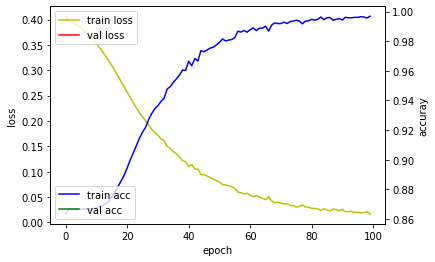

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(train_loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')

acc_ax.plot(train_acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
import numpy as np
from tensorflow.keras import models

#model = models.load_model('model.h5')

In [ ]:
import numpy as np
from tensorflow.keras import models

mean_prize = [ np.mean(dataset[87:, 8]),
           np.mean(dataset[87:, 9]),
           np.mean(dataset[87:, 10]),
           np.mean(dataset[87:, 11]),
           np.mean(dataset[87:, 12])]

print(mean_prize)           

[2435162114.1282635, 57184539.69466516, 1451158.803632236, 52804.742338251985, 5000.0]


In [ ]:
def calc_reward(true_numbers, true_bonus, pred_numbers):

    count = 0

    for ps in pred_numbers:
        if ps in true_numbers:
            count += 1

    if count == 6:
        return mean_prize[0], count
    elif count == 5 and true_bonus in pred_numbers:
        return mean_prize[1], count
    elif count == 5:
        return mean_prize[2], count
    elif count == 4:
        return mean_prize[3], count
    elif count == 3:
        return mean_prize[4], count

    return 0, count

In [ ]:
def gen_numbers_from_probability(nums_prob):

    ball_box = []

    for n in range(45):
        ball_count = int(nums_prob[n] * 100 + 1)
        ball = np.full((ball_count), n+1) #1부터 시작
        ball_box += list(ball)

    selected_balls = []

    while True:
        
        if len(selected_balls) == 6:
            break
        
        ball_index = np.random.randint(len(ball_box), size=1)[0]
        ball = ball_box[ball_index]

        #print('{0} {1} {2}'.format(len(ball_box), ball_index, ball))

        if ball not in selected_balls:
            selected_balls.append(ball)

    return selected_balls

In [ ]:
model.reset_states()

gi = 1

rewards = []

for i in range(len(x_train)):
    xs = x_train[i].reshape(1, 1, 45)
    ys_pred = model.predict_on_batch(xs)
    
    sum_rewards = 0

    print('No.{0:3d} True Numbers {1}'.format(gi+1, dataset[gi,1:7]))
    
    for n in range(10):
        numbers = gen_numbers_from_probability(ys_pred[0])
        reward, count = calc_reward(dataset[gi,1:7], dataset[gi,7], numbers)
        
        print('{0:2d} {1:15,d} {2:4d} {3}'.format(n, int(reward), count, numbers))

        sum_rewards += reward
    
    print('Total Reward: {0:15,d}'.format(int(sum_rewards)))

    rewards.append(sum_rewards)
    gi += 1
'''
for i in range(len(x_val)):
    xs = x_val[i].reshape(1, 1, 45)
    ys_pred = model.predict_on_batch(xs)

    sum_rewards = 0
    for n in range(10):
        numbers = gen_numbers_from_probability(ys_pred[0])
        sum_rewards += calc_reward(dataset[gi,1:7], dataset[gi,7], numbers)

    print('{0:4d} {1} {2} {3:.1f}'.format(gi, dataset[gi,1:7], numbers, sum_rewards))
    rewards.append(sum_rewards)
    gi += 1

for i in range(len(x_test)):
    xs = x_test[i].reshape(1, 1, 45)
    ys_pred = model.predict_on_batch(xs)

    sum_rewards = 0

    for n in range(10):
        numbers = gen_numbers_from_probability(ys_pred[0])
        sum_rewards += calc_reward(dataset[gi,1:7], dataset[gi,7], numbers)

    print('{0:4d} {1} {2} {3:.1f}'.format(gi, dataset[gi,1:7], numbers, sum_rewards))
    rewards.append(sum_rewards)
    gi += 1
'''    

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 3       1,451,158    5 [4, 1, 32, 20, 40, 35]
 4          52,804    4 [40, 1, 32, 10, 18, 6]
 5          52,804    4 [1, 41, 35, 32, 39, 40]
 6          52,804    4 [20, 35, 11, 40, 1, 19]
 7          52,804    4 [1, 40, 32, 18, 39, 10]
 8          52,804    4 [1, 33, 38, 35, 20, 32]
 9       1,451,158    5 [1, 18, 35, 40, 32, 10]
Total Reward:       4,675,304
No.553 True Numbers [ 2.  7. 17. 28. 29. 39.]
 0          52,804    4 [17, 14, 39, 29, 41, 2]
 1   2,435,162,114    6 [2, 28, 29, 17, 39, 7]
 2   2,435,162,114    6 [17, 39, 29, 28, 7, 2]
 3       1,451,158    5 [17, 39, 7, 29, 28, 19]
 4   2,435,162,114    6 [29, 17, 39, 7, 28, 2]
 5       1,451,158    5 [39, 17, 2, 29, 28, 33]
 6       1,451,158    5 [39, 7, 28, 17, 2, 36]
 7       1,451,158    5 [29, 7, 28, 17, 39, 45]
 8       1,451,158    5 [29, 17, 28, 7, 39, 33]
 9          52,804    4 [17, 13, 23, 28, 39, 2]
Total Reward:   7,312,847,745
No.554 True Numbers [13. 14. 17. 32. 41. 42.]
 0

"\nfor i in range(len(x_val)):\n    xs = x_val[i].reshape(1, 1, 45)\n    ys_pred = model.predict_on_batch(xs)\n\n    sum_rewards = 0\n    for n in range(10):\n        numbers = gen_numbers_from_probability(ys_pred[0])\n        sum_rewards += calc_reward(dataset[gi,1:7], dataset[gi,7], numbers)\n\n    print('{0:4d} {1} {2} {3:.1f}'.format(gi, dataset[gi,1:7], numbers, sum_rewards))\n    rewards.append(sum_rewards)\n    gi += 1\n\nfor i in range(len(x_test)):\n    xs = x_test[i].reshape(1, 1, 45)\n    ys_pred = model.predict_on_batch(xs)\n\n    sum_rewards = 0\n\n    for n in range(10):\n        numbers = gen_numbers_from_probability(ys_pred[0])\n        sum_rewards += calc_reward(dataset[gi,1:7], dataset[gi,7], numbers)\n\n    print('{0:4d} {1} {2} {3:.1f}'.format(gi, dataset[gi,1:7], numbers, sum_rewards))\n    rewards.append(sum_rewards)\n    gi += 1\n"

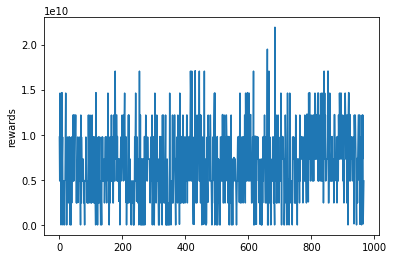

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(rewards)
plt.ylabel('rewards')
plt.show()

In [ ]:
print('receive numbers')

xs = samples[-1].reshape(1, 1, 45)

ys_pred = model.predict_on_batch(xs)

list_numbers = []

for n in range(10):
    numbers = gen_numbers_from_probability(ys_pred[0])
    print('{0} : {1}'.format(n, numbers))
    list_numbers.append(numbers)

receive numbers
0 : [24, 19, 16, 3, 44, 30]
1 : [3, 30, 43, 8, 16, 24]
2 : [16, 8, 19, 21, 24, 30]
3 : [16, 35, 30, 12, 3, 6]
4 : [43, 24, 19, 30, 8, 6]
5 : [8, 24, 30, 43, 44, 3]
6 : [43, 30, 31, 11, 21, 3]
7 : [30, 16, 8, 43, 3, 24]
8 : [21, 30, 43, 8, 19, 24]
9 : [30, 4, 3, 19, 8, 15]


In [ ]:
print(list_numbers[0])
print(list_numbers[1])
print(list_numbers[2])
print(list_numbers[3])
print(list_numbers[4])
print(list_numbers[5])
print(list_numbers[6])
print(list_numbers[7])
print(list_numbers[8])
print(list_numbers[9])

[24, 19, 16, 3, 44, 30]
[3, 30, 43, 8, 16, 24]
[16, 8, 19, 21, 24, 30]
[16, 35, 30, 12, 3, 6]
[43, 24, 19, 30, 8, 6]
[8, 24, 30, 43, 44, 3]
[43, 30, 31, 11, 21, 3]
[30, 16, 8, 43, 3, 24]
[21, 30, 43, 8, 19, 24]
[30, 4, 3, 19, 8, 15]


In [ ]:
print('rewards check')
total_rewards = 0

for n in range(len(list_numbers)):
    reward, count = calc_reward([19,32,37,40,41,43], [45], list_numbers[n])
    print('{0} {1:15,d}'.format(count, int(reward)))
    total_rewards += reward

print('Total {0:15,d}'.format(int(total_rewards)))

rewards check
1               0
1               0
1               0
0               0
2               0
1               0
1               0
1               0
2               0
1               0
Total               0
